# Business problem understanding
## Business context
Olist Store is a Brazilian e-commerce platform, enambling small and medium-sized business to sell their products across multiple marketplaces through a single channel. Olist helps sellers by providing services such as logistic support, marketing tools, and payment services. 

To sustain growth and enhance values offered to users, understanding customers behavior and identify areas for improvement are essential. By analyzing the publicly available dataset by Olist, this study aims to provide key insights and provide data-driven recommendations. This insights will help in optimizing the operation of olist store, improve customer satisfaction, and drive long-term business success.

## Problem statement
## Goals
## Analytic approach
The approach of this study is first to conduct Recency Frequency Monetary (RFM) analysis to see the segmentation of the customer. Subsequently, churn prediction will be performed using machine learning to predict which customers will likely will churn. This input, will be the base of creating marketing strategy to retain user

## Data information
source: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce



The data is provided by Olist from year 2016 - 2018 with more than 100k orders information. The data is divided into multiple files in which its connection is shown in the schema below

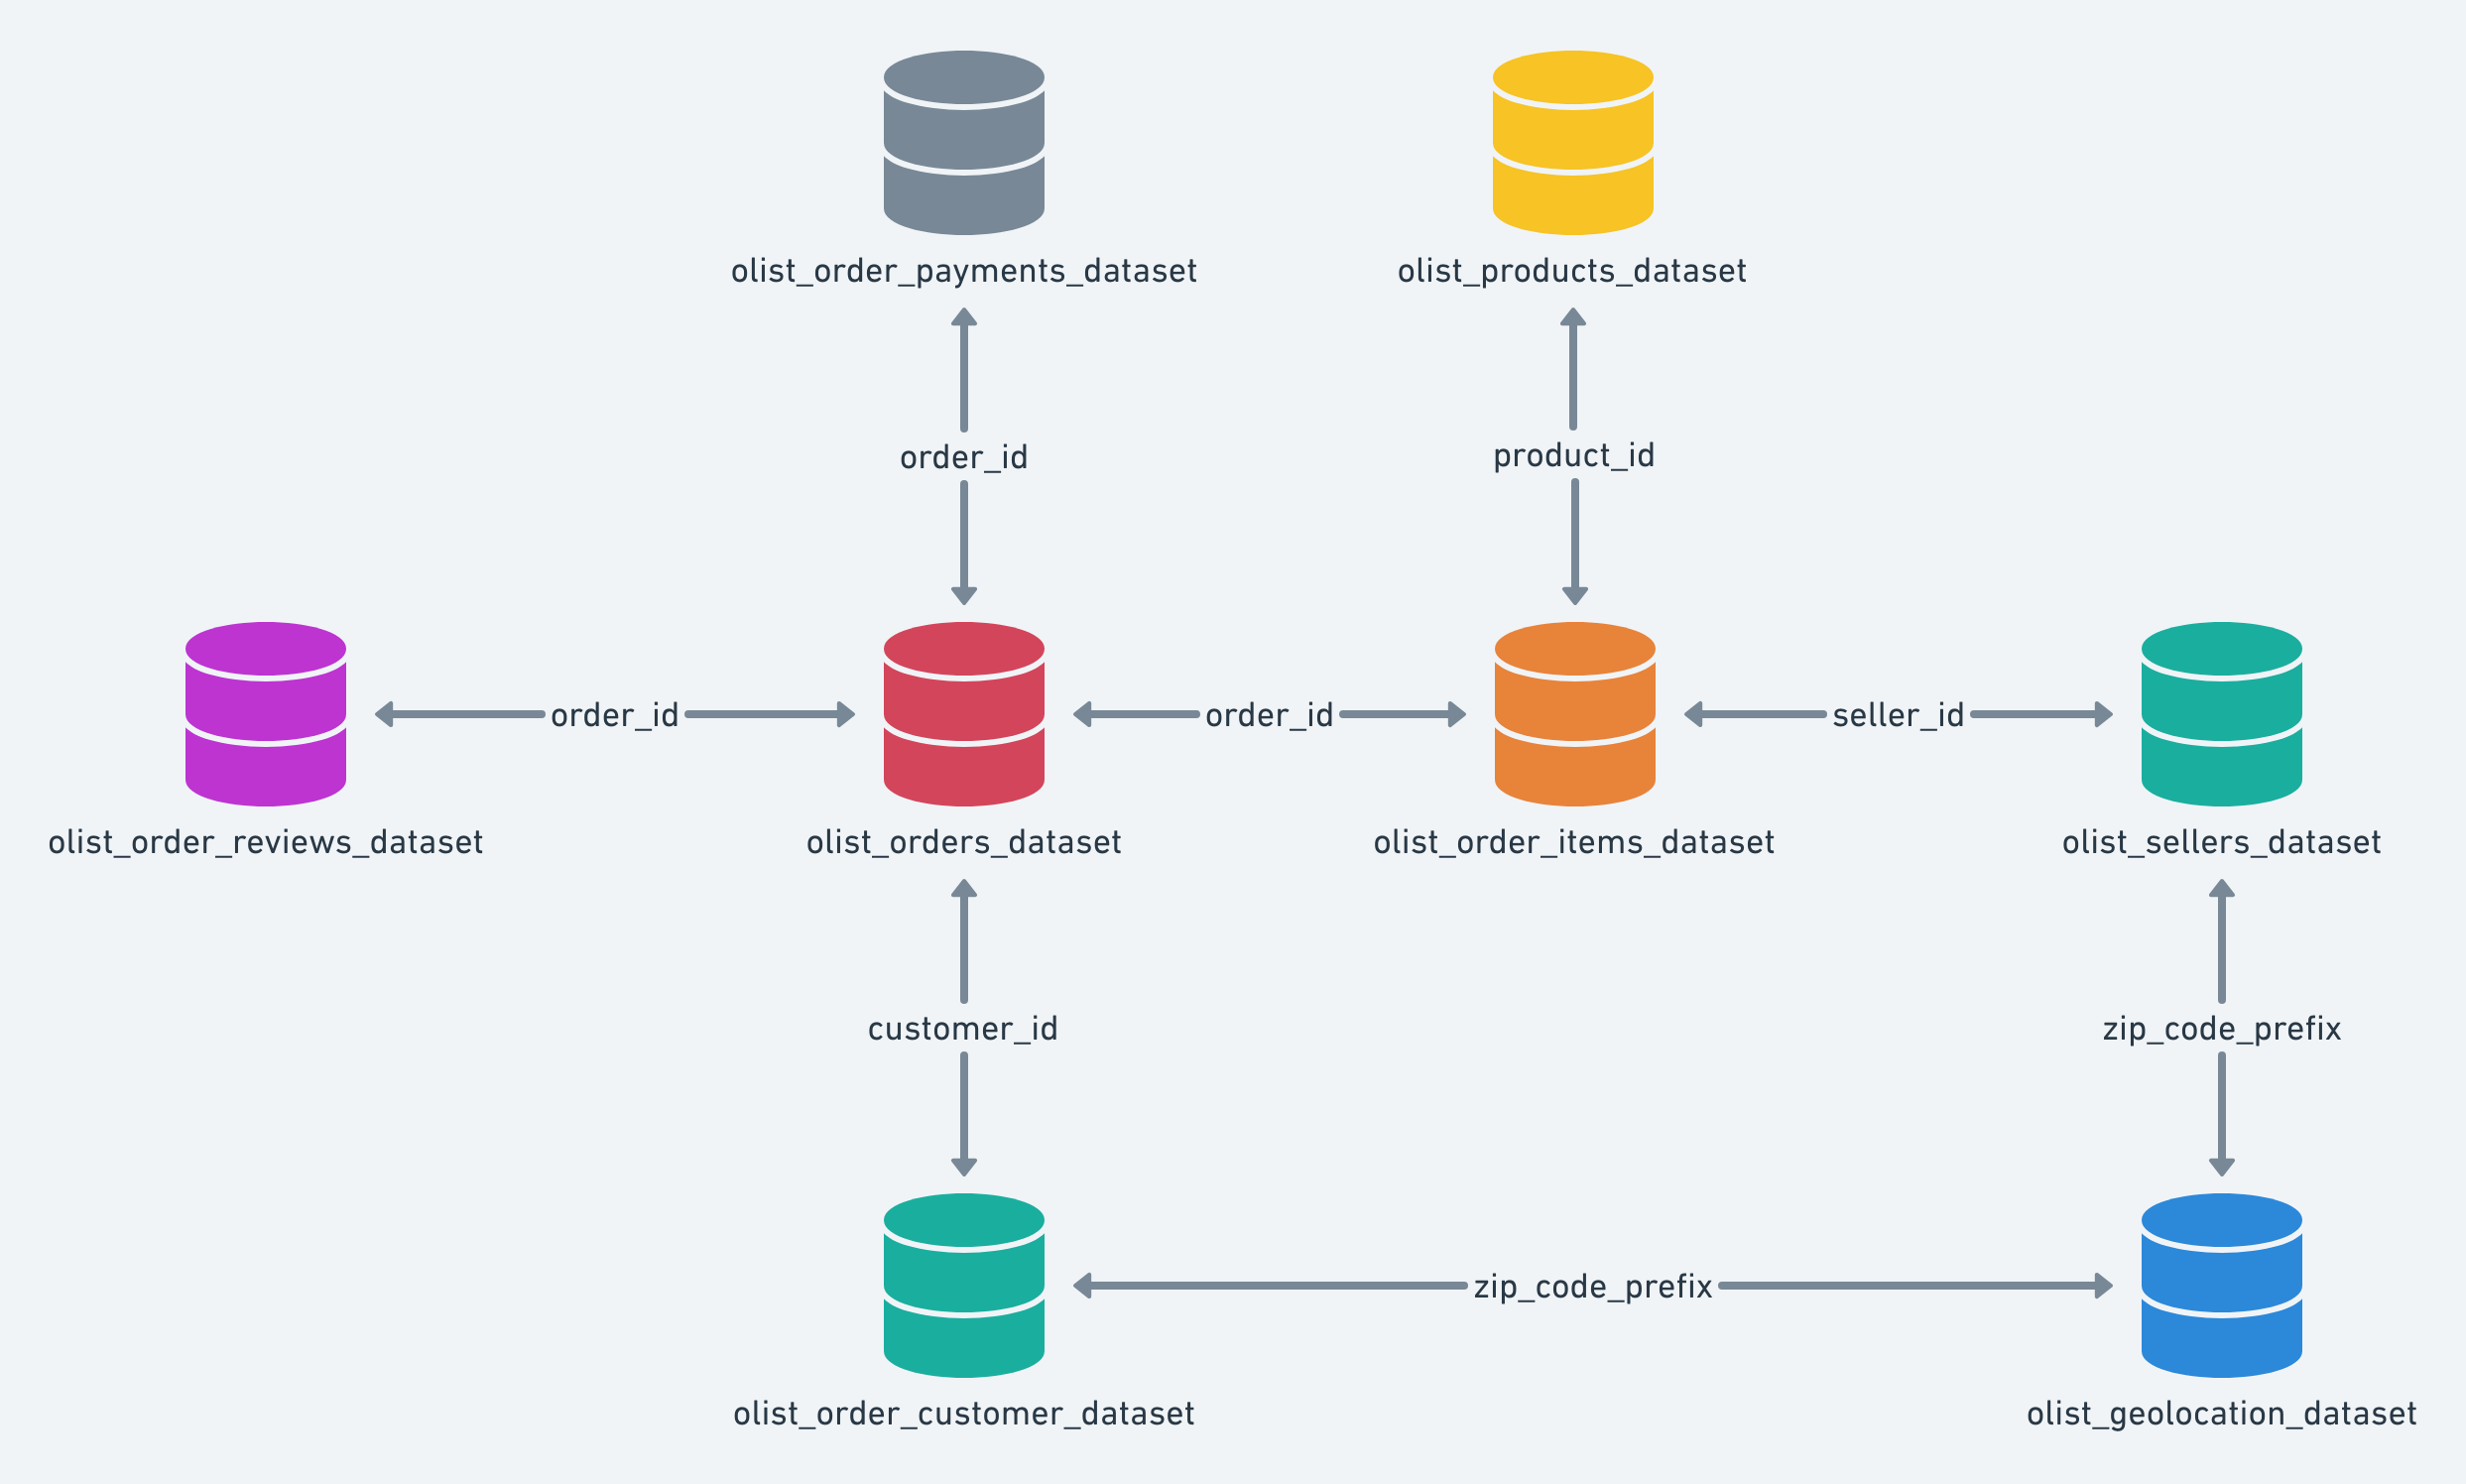

In [44]:
from IPython.display import Image

Image(filename=r'C:\Users\u0150029\Documents\PWD\final_project_alpha\untitled.png')

**Data Dictionary**


| Dataset                     | Column                          | Description                                                                 |
|-----------------------------|--------------------------------|---------------------------------------------------------------------------|
| **olist_customers_dataset**  | customer_id                    | Unique ID of the customer who placed an order                                  |
|                             | customer_unique_id             | 	Unique ID that distinguishes customers more specifically                   |
|                             | customer_zip_code_prefix       | Customer's zip code                                                        |
|                             | customer_city                  | City where the customer resides                                             |
|                             | customer_state                 | State where the customer resides                                           |
| **olist_geolocation_dataset** | geolocation_zip_code_prefix   | Zip code of the geographical location                                                 |
|                             | geolocation_lat                | Latitude of the geographical location                                            |
|                             | geolocation_lng                | Longitude of the geographical location                                           |
|                             | geolocation_city               | City where the geographical location is                                              |
|                             | geolocation_state              | State or province where the geographical location is                       |
| **olist_order_items_dataset** | order_id                      | Unique ID for each order                                             |
|                             | order_item_id                  | Unique ID for each item within an order                                   |
|                             | product_id                     | Unique ID of the purchased product                                                |
|                             | seller_id                      | ID of the seller who sold the product                                            |
|                             | shipping_limit_date            | Shipping deadline for the product                                             |
|                             | price                          | Price of the purchased product                                                  |
|                             | freight_value                  | Shipping cost for the product                                             |
| **olist_order_payments_dataset** | order_id                    | Order ID associated with the payment                                 |
|                             | payment_sequential             | Payment sequence within the order                                          |
|                             | payment_type                   | Payment method (e.g., credit card)                                |
|                             | payment_installments           | Number of installments chosen                                               |
|                             | payment_value                  | Total payment amount                                                    |
| **olist_order_reviews_dataset** | review_id                    | Unique ID for each review given                               |
|                             | order_id                       | Order ID associated with the review                                     |
|                             | review_score                   | Score given by the customer for the product (e.g., 1 to 5)    |
|                             | review_comment_title           | Title of the review comment                                                     |
|                             | review_comment_message         | Content of the review comment given by the customer              |
|                             | review_creation_date           | Date and time when the review was created                                           |
|                             | review_answer_timestamp        | Date and time when the review was answered by the seller or relevant party   |
| **olist_orders_dataset**     | order_id                       | Unique ID for each order                                             |
|                             | customer_id                    | Unique ID of the customer who placed the order                                  |
|                             | order_status                   | Current status of the order (e.g., processing, shipped, or completed)    |
|                             | order_purchase_timestamp       | Date and time when the order was placed                                       |
|                             | order_approved_at              | Date and time when the order was approved                                       |
|                             | order_delivered_carrier_date   | Date the product was shipped by the carrier                                      |
|                             | order_delivered_customer_date  | Date the product was received by the customer                                    |
|                             | order_estimated_delivery_date  | Estimated date for product delivery                               |
| **olist_products_dataset**   | product_category_name_translation | Product name in Portuguese                                        |
|                             | product_category_name          | Product name in Portuguese                                        |
|                             | product_category_name_english  | Product name in English                                         |
|                             | product_id                     | Unique identifier for each product                                    |
|                             | product_category_name          | Category name where the product belongs                               |
|                             | product_name_lenght            | Length of the product name (characters)                                          |
|                             | product_description_lenght     | Length of the product description (characters)                                     |
|                             | product_photos_qty             | Number of available product photos                                                     |
|                             | product_weight_g               | Product weight (grams)                                                         |
|                             | product_length_cm              | Product length (cm)                                                      |
|                             | product_height_cm              | Product height (cm)                                                       |
|                             | product_width_cm               | Product width (cm)                                                        |
| **olist_sellers_dataset**    | seller_id                      | Unique ID for each seller in the system                                       |
|                             | seller_zip_code_prefix         | Zip code of the seller's residence or location                               |
|                             | seller_city                    | City where the seller is located                                           |
|                             | seller_state                   | State or province where the seller is located                    |


# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
geoloc = pd.read_csv('olist_geolocation_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
products_en = pd.read_csv('product_category_name_translation.csv')

In [3]:
display(customers.head(), geoloc.head(), items.head(), payments.head(), reviews.head(), orders.head(), products.head(), sellers.head(), products_en.head())

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

## Translate the products name into English (was in Portugese)

In [4]:
products = products.merge(products_en, how='left', on='product_category_name')

In [5]:
products

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm product_category_name_english  
0                  14.0                     perfumery  
1                  20.0                           art  
2                  15.0                sports_leisure  
3                  26.0                          baby  
4                  13.0                    housewares  
...                 ...                           ...  
32946              40.0               furniture_decor  
32947              16.0     construction_tools_lights  
32948              27.0                bed_bath_table  
32949              20.0         computers_accessories  
32950               7.0                bed_bath_table  

[32951 rows x 10 columns]

In [6]:
#check how many unique values between both to ensure each product has english translation
# pt stands for portuguese

n_products_pt = products['product_category_name'].nunique()
print(f'Number of products in Portuese is: {n_products_pt}')

n_products_en = products_en['product_category_name'].nunique()
print(f'Number of products in English is: {n_products_en}')

Number of products in Portuese is: 73
Number of products in English is: 71


In [29]:
#above result shows that there are 2 missing translations. Code below will perform further check
missing_cat = products.loc[products['product_category_name_english'].isna(), 'product_category_name'].unique()
missing_cat

array([nan], dtype=object)

As shown above, there are two categories missing from the product_en and here manual translation will be performed using chatGPT. 
The translation for 'portateis_cozinha_e_preparadores_de_alimentos' is 'portable_kitchen_and_food_processors'.
Here, pc_gamer is already in English, however it will still be incorporated to the 'product_category_name_english'.  

In [30]:
products[products['product_category_name'].isin(['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'])].head()

product_id  \
1628  0105b5323d24fc655f73052694dbbb3a   
5821  6fd83eb3e0799b775e4f946bd66657c0   
7325  5d923ead886c44b86845f69e50520c3e   
7478  6727051471a0fc4a0e7737b57bff2549   
8819  bed164d9d628cf0593003389c535c6e0   

                              product_category_name  product_name_lenght  \
1628                                       pc_gamer                 59.0   
5821  portateis_cozinha_e_preparadores_de_alimentos                 52.0   
7325  portateis_cozinha_e_preparadores_de_alimentos                 58.0   
7478                                       pc_gamer                 60.0   
8819  portateis_cozinha_e_preparadores_de_alimentos                 54.0   

      product_description_lenght  product_photos_qty  product_weight_g  \
1628                       621.0                 4.0            2839.0   
5821                       280.0                 1.0            1200.0   
7325                       284.0                 1.0            1200.0   
7478                      1532.0                 3.0             650.0   
8819                       382.0                 2.0             850.0   

      product_length_cm  product_height_cm  product_width_cm  \
1628               19.0               16.0              18.0   
5821               25.0               33.0              25.0   
7325               25.0               33.0              25.0   
7478               16.0               22.0              20.0   
8819               30.0               21.0              22.0   

             product_category_name_english  grouped_category  
1628                              pc_gamer       electronics  
5821  portable_kitchen_and_food_processors  home_and_kitchen  
7325  portable_kitchen_and_food_processors  home_and_kitchen  
7478                              pc_gamer       electronics  
8819  portable_kitchen_and_food_processors  home_and_kitchen

In [31]:
mapping = {'pc_gamer': 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos': 'portable_kitchen_and_food_processors'}
products.loc[products['product_category_name_english'].isna(), 'product_category_name_english'] = (products['product_category_name'].map(mapping))

In [32]:
#check
products[products['product_category_name'].isin(['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'])].head()

product_id  \
1628  0105b5323d24fc655f73052694dbbb3a   
5821  6fd83eb3e0799b775e4f946bd66657c0   
7325  5d923ead886c44b86845f69e50520c3e   
7478  6727051471a0fc4a0e7737b57bff2549   
8819  bed164d9d628cf0593003389c535c6e0   

                              product_category_name  product_name_lenght  \
1628                                       pc_gamer                 59.0   
5821  portateis_cozinha_e_preparadores_de_alimentos                 52.0   
7325  portateis_cozinha_e_preparadores_de_alimentos                 58.0   
7478                                       pc_gamer                 60.0   
8819  portateis_cozinha_e_preparadores_de_alimentos                 54.0   

      product_description_lenght  product_photos_qty  product_weight_g  \
1628                       621.0                 4.0            2839.0   
5821                       280.0                 1.0            1200.0   
7325                       284.0                 1.0            1200.0   
7478                      1532.0                 3.0             650.0   
8819                       382.0                 2.0             850.0   

      product_length_cm  product_height_cm  product_width_cm  \
1628               19.0               16.0              18.0   
5821               25.0               33.0              25.0   
7325               25.0               33.0              25.0   
7478               16.0               22.0              20.0   
8819               30.0               21.0              22.0   

             product_category_name_english  grouped_category  
1628                              pc_gamer       electronics  
5821  portable_kitchen_and_food_processors  home_and_kitchen  
7325  portable_kitchen_and_food_processors  home_and_kitchen  
7478                              pc_gamer       electronics  
8819  portable_kitchen_and_food_processors  home_and_kitchen

In [41]:
products['product_category_name'].isna().sum()

610

In [33]:
products['product_category_name_english'].nunique()

73

In [34]:
products['product_category_name_english'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', nan, 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'hom

Here, we observed that actually the product names are redundant. Thus, we want to create a new column which specifies which group does each product name belong to

In [35]:
# Create a dictionary with mappings to simplify the categories
category_map = {
    'small_appliances': 'home_and_kitchen',
    'home_appliances': 'home_and_kitchen',
    'home_appliances_2': 'home_and_kitchen',
    'air_conditioning': 'home_and_kitchen',
    'home_comfort_2': 'home_and_kitchen',
    'home_confort': 'home_and_kitchen',
    'portable_kitchen_and_food_processors': 'home_and_kitchen',
    'small_appliances_home_oven_and_coffee': 'home_and_kitchen',
    'bed_bath_table': 'home_and_kitchen',
    'housewares': 'home_and_kitchen',
    'kitchen_dining_laundry_garden_furniture': 'home_and_kitchen',
    
    
    'furniture_living_room': 'furniture',
    'furniture_bedroom': 'furniture',
    'furniture_mattress_and_upholstery': 'furniture',
    'furniture_decor': 'furniture', 
    
    'fashion_bags_accessories': 'fashion',
    'fashion_shoes': 'fashion',
    'fashion_male_clothing': 'fashion',
    'fashio_female_clothing': 'fashion',
    'fashion_underwear_beach': 'fashion',
     
    'baby': 'baby_and_children',
    'fashion_childrens_clothes': 'baby_and_children', 
    
    'books_general_interest': 'books',
    'books_technical': 'books',
    'books_imported': 'books',
    
    'toys': 'toys_and_games',
    'consoles_games': 'toys_and_games',
    
    'food': 'food_and_beverages',
    'food_drink': 'food_and_beverages',
    'drinks': 'food_and_beverages',
    'la_cuisine': 'food_and_beverages', 
    
    'health_beauty': 'health_and_beauty',
    'diapers_and_hygiene': 'health_and_beauty',
    'perfumery': 'health_and_beauty', 
    
    'sports_leisure': 'sports_and_leisure',
    'fashion_sport': 'sports_and_leisure',
    
    'electronics': 'electronics',
    'computers': 'electronics',
    'computers_accessories': 'electronics',
    'audio': 'electronics',
    'telephony': 'electronics', 
    'table_printing_image': 'electronics', 
    'fixed_telephony': 'electronics', 
    'pc_gamer': 'electronics',
    
    'stationery': 'office_and_stationery',
    'office_furniture': 'office_and_stationery', 

    'construction_tools_construction': 'tools_and_construction', 
    'construction_tools_lights': 'tools_and_construction',
    'costruction_tools_garden': 'tools_and_construction',
    'home_construction': 'tools_and_construction',
    'construction_tools_safety': 'tools_and_construction', 
    'garden_tools': 'tools_and_construction',
    'costruction_tools_tools': 'tools_and_construction',

    'signaling_and_security': 'security_and_services',
    'security_and_services': 'security_and_services',

    'cool_stuff': 'gifts_and_miscellaneous',
    'watches_gifts': 'gifts_and_miscellaneous',
    'flowers': 'gifts_and_miscellaneous',
    'party_supplies': 'gifts_and_miscellaneous',
    'christmas_supplies': 'gifts_and_miscellaneous',
    'auto': 'gifts_and_miscellaneous',
    'luggage_accessories': 'gifts_and_miscellaneous',
    
    'market_place': 'marketplace',

    'cds_dvds_musicals': 'media',
    'cine_photo': 'media',
    'dvds_blu_ray': 'media',
    
    'music': 'music_and_art',
    'musical_instruments': 'music_and_art',
    'arts_and_craftmanship': 'music_and_art',
    'arts_and_crafts': 'music_and_art',
    'art': 'music_and_art', 

    'pet_shop': 'pet_shop', 
    
    'industry_commerce_and_business': 'industry_and_business',
    'agro_industry_and_commerce': 'industry_and_business', 
}

In [36]:
products['grouped_category'] = products['product_category_name_english'].map(category_map)

In [37]:
products[['product_category_name_english', 'grouped_category']].head()

product_category_name_english    grouped_category
0                     perfumery   health_and_beauty
1                           art       music_and_art
2                sports_leisure  sports_and_leisure
3                          baby   baby_and_children
4                    housewares    home_and_kitchen

In [46]:
nan_rows = products[products['grouped ca'].notna()][['product_category_name','grouped_category', 'product_category_name_english']]
nan_rows

product_category_name        grouped_category  \
0                             perfumaria       health_and_beauty   
1                                  artes           music_and_art   
2                          esporte_lazer      sports_and_leisure   
3                                  bebes       baby_and_children   
4                  utilidades_domesticas        home_and_kitchen   
...                                  ...                     ...   
32946                   moveis_decoracao               furniture   
32947  construcao_ferramentas_iluminacao  tools_and_construction   
32948                    cama_mesa_banho        home_and_kitchen   
32949             informatica_acessorios             electronics   
32950                    cama_mesa_banho        home_and_kitchen   

      product_category_name_english  
0                         perfumery  
1                               art  
2                    sports_leisure  
3                              baby  
4                        housewares  
...                             ...  
32946               furniture_decor  
32947     construction_tools_lights  
32948                bed_bath_table  
32949         computers_accessories  
32950                bed_bath_table  

[32341 rows x 3 columns]

In [48]:
print(products[['grouped_category', 'product_category_name_english']].isna().sum())

grouped_category                 619
product_category_name_english    610
dtype: int64


## Merging Data

In [137]:
df = orders.merge(items, how='left', on='order_id')
df = df.merge(payments, how='outer', on='order_id')
df = df.merge(reviews, how='outer', on='order_id')
df = df.merge(products, how='outer', on='product_id')
df = df.merge(customers, how='outer', on='customer_id')
df = df.merge(sellers, how='outer', on='seller_id')

In [138]:
df.head()

order_id                       customer_id  \
0  d455a8cb295653b55abda06d434ab492  944b72539d7e1f7f7fc6e46639ef1fe3   
1  7f39ba4c9052be115350065d07583cac  d7fc82cbeafea77bd0a8fbbf6296e387   
2  9dc8d1a6f16f1b89874c29c9d8d30447  d9442164acf4b03109425633efaa0cfc   
3  0f548bd29148ebc519d6495e37a284e1  015faf9ec36eccd957c0f2782aab09a4   
4  0f548bd29148ebc519d6495e37a284e1  015faf9ec36eccd957c0f2782aab09a4   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-09-26 22:17:05  2017-09-27 22:24:16   
1    delivered      2017-10-18 08:16:34  2017-10-18 23:56:20   
2    delivered      2017-10-12 13:33:22  2017-10-12 13:49:22   
3    delivered      2017-09-03 08:06:30  2017-09-03 08:25:50   
4    delivered      2017-09-03 08:06:30  2017-09-03 08:25:50   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-09-29 15:53:03           2017-10-07 16:12:47   
1          2017-10-20 14:29:01           2017-10-27 16:46:05   
2          2017-10-17 15:42:42           2017-10-24 20:17:44   
3          2017-09-04 22:03:06           2017-09-08 16:26:55   
4          2017-09-04 22:03:06           2017-09-08 16:26:55   

  order_estimated_delivery_date  order_item_id  \
0           2017-10-30 00:00:00            1.0   
1           2017-11-09 00:00:00            1.0   
2           2017-11-06 00:00:00            1.0   
3           2017-09-27 00:00:00            1.0   
4           2017-09-27 00:00:00            2.0   

                         product_id  ... product_height_cm product_width_cm  \
0  a2ff5a97bf95719e38ea2e3b4105bce8  ...              43.0             36.0   
1  a2ff5a97bf95719e38ea2e3b4105bce8  ...              43.0             36.0   
2  a2ff5a97bf95719e38ea2e3b4105bce8  ...              43.0             36.0   
3  08574b074924071f4e201e151b152b4e  ...              12.0             39.0   
4  08574b074924071f4e201e151b152b4e  ...              12.0             39.0   

   product_category_name_english                customer_unique_id  \
0               small_appliances  3c7e305796add66698959fc7ad176f6b   
1               small_appliances  9de5797cddb92598755a0f76383ddbbb   
2               small_appliances  9915eb9f74b6c11aaf04833f65b00e93   
3                   garden_tools  dce323533e45e74d215e0fe7fb114118   
4                   garden_tools  dce323533e45e74d215e0fe7fb114118   

   customer_zip_code_prefix        customer_city  customer_state  \
0                     87502             umuarama              PR   
1                     35490  entre rios de minas              MG   
2                     38600             paracatu              MG   
3                     24710          sao goncalo              RJ   
4                     24710          sao goncalo              RJ   

   seller_zip_code_prefix  seller_city  seller_state  
0                  9080.0  santo andre            SP  
1                  9080.0  santo andre            SP  
2                  9080.0  santo andre            SP  
3                 29156.0    cariacica            ES  
4                 29156.0    cariacica            ES  

[5 rows x 40 columns]

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

## Data Cleaning

The idea here is that to drop columns that are not useful. For example: the reviews are in Portuguese, beside it does not align with the purpose of the analysis, such data type requires different data handling. Same reason goes to the products. the column that will be dropped are:
- review_id
- review_comment_title
- review_comment_message
- review_creation_date
- review_answer_timestamp
- product_name_length
- product_description_length
- product_photos_qty
- product_weight_g
- product_length_cm
- product_height_cm
- product_width_cm
- product_category_name
- customer_zip_code_prefix (?)
- seller_zip_code_prefix (?)

In [140]:
df.drop(columns=['review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name'], inplace= True)  

In [141]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
order_estimated_delivery_date       0
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_score                      997
product_category_name_english    2542
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
seller_zip_code_prefix            833
seller_city                       833
seller_state

## Handling duplicate data 

Since everything was merged based on the orders dataset, thus it make sense that in order to eliminate duplicate values, it should then be order_id. It still make perfect sense for the rest of the columns to have duplicate value

In [142]:
df = df.drop_duplicates(subset='order_id', keep='first')

In [143]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
review_score                      768
product_category_name_english    2188
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
seller_zip_code_prefix            775
seller_city                       775
seller_state

## Drop NaN value

In [144]:
df.dropna(inplace=True)

In [145]:
df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
product_category_name_english    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
dtype: int64

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94470 entries, 0 to 118309
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       94470 non-null  object 
 1   customer_id                    94470 non-null  object 
 2   order_status                   94470 non-null  object 
 3   order_purchase_timestamp       94470 non-null  object 
 4   order_approved_at              94470 non-null  object 
 5   order_delivered_carrier_date   94470 non-null  object 
 6   order_delivered_customer_date  94470 non-null  object 
 7   order_estimated_delivery_date  94470 non-null  object 
 8   order_item_id                  94470 non-null  float64
 9   product_id                     94470 non-null  object 
 10  seller_id                      94470 non-null  object 
 11  shipping_limit_date            94470 non-null  object 
 12  price                          94470 non-null  flo

## Change data format

In [149]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']

for columns in df.columns:
    if columns in date_columns:
        df[columns] = pd.to_datetime(df[columns])
    

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94470 entries, 0 to 118309
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94470 non-null  object        
 1   customer_id                    94470 non-null  object        
 2   order_status                   94470 non-null  object        
 3   order_purchase_timestamp       94470 non-null  datetime64[ns]
 4   order_approved_at              94470 non-null  datetime64[ns]
 5   order_delivered_carrier_date   94470 non-null  datetime64[ns]
 6   order_delivered_customer_date  94470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  94470 non-null  datetime64[ns]
 8   order_item_id                  94470 non-null  float64       
 9   product_id                     94470 non-null  object        
 10  seller_id                      94470 non-null  object        
 11  shipping_limit_date

In [151]:
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
product_category_name_english    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
dtype: int64

## Change column name

In [152]:
df = df.rename(columns={'product_category_name_english': 'product_name'})

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94470 entries, 0 to 118309
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94470 non-null  object        
 1   customer_id                    94470 non-null  object        
 2   order_status                   94470 non-null  object        
 3   order_purchase_timestamp       94470 non-null  datetime64[ns]
 4   order_approved_at              94470 non-null  datetime64[ns]
 5   order_delivered_carrier_date   94470 non-null  datetime64[ns]
 6   order_delivered_customer_date  94470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  94470 non-null  datetime64[ns]
 8   order_item_id                  94470 non-null  float64       
 9   product_id                     94470 non-null  object        
 10  seller_id                      94470 non-null  object        
 11  shipping_limit_date

In [154]:
df.reset_index(drop=True, inplace=True)

# EDA

### Delivery time

In [155]:
df[['order_estimated_delivery_date', 'order_delivered_customer_date', 'order_delivered_carrier_date']]

order_estimated_delivery_date order_delivered_customer_date  \
0                        2017-10-30                    2017-10-07   
1                        2017-11-09                    2017-10-27   
2                        2017-11-06                    2017-10-24   
3                        2017-09-27                    2017-09-08   
4                        2017-11-16                    2017-11-08   
...                             ...                           ...   
94465                    2017-03-16                    2017-01-27   
94466                    2016-12-16                    2016-10-25   
94467                    2017-03-15                    2017-01-30   
94468                    2017-03-13                    2017-01-26   
94469                    2017-03-16                    2017-02-01   

      order_delivered_carrier_date  
0                       2017-09-29  
1                       2017-10-20  
2                       2017-10-17  
3                       2017-09-04  
4                       2017-10-24  
...                            ...  
94465                   2017-01-25  
94466                   2016-10-25  
94467                   2017-01-25  
94468                   2017-01-24  
94469                   2017-01-26  

[94470 rows x 3 columns]

In [156]:
df['actual_shipping_days'] = (df['order_delivered_customer_date'] - df['order_delivered_carrier_date']).dt.days
print(df['actual_shipping_days'].dtype)

int64


In [157]:
df['actual_shipping_days'] = df['actual_shipping_days'].astype(int)

In [207]:
# this shows an error in the system because the customer received the product before the delivered date 
df['actual_shipping_days'].lt(0).sum()

20

In [208]:
df['actual_shipping_days'] = df['actual_shipping_days'].where(df['actual_shipping_days'] >= 0, -999)

In [209]:
df['estimated_shipping_days'] = df['order_estimated_delivery_date'] - df['order_delivered_carrier_date']
df['estimated_shipping_days'] = df['estimated_shipping_days'].dt.days.astype(int)

In [210]:
df['estimated_shipping_days'].lt(0).sum()

311

In [211]:
df['estimated_shipping_days'] = df['estimated_shipping_days'].where(df['estimated_shipping_days'] >= 0, -999)

In [212]:
df['shipping_delay'] = df['actual_shipping_days'] - df['estimated_shipping_days']
df['shipping_delay'] = df['shipping_delay'].astype(int)

In [213]:
late = (df['shipping_delay'].gt(0) & df['shipping_delay'].lt(700)).sum()
early = df['shipping_delay'].lt(0).sum()
ontime = df['shipping_delay'].eq(0).sum()
error = df['shipping_delay'].gt(600).sum()

In [214]:
print(late, "orders were late")  
print(early, "orders were early") 
print(ontime, "orders were on time") 
print(error, "system error")

5970 orders were late
86932 orders were early
1257 orders were on time
311 system error


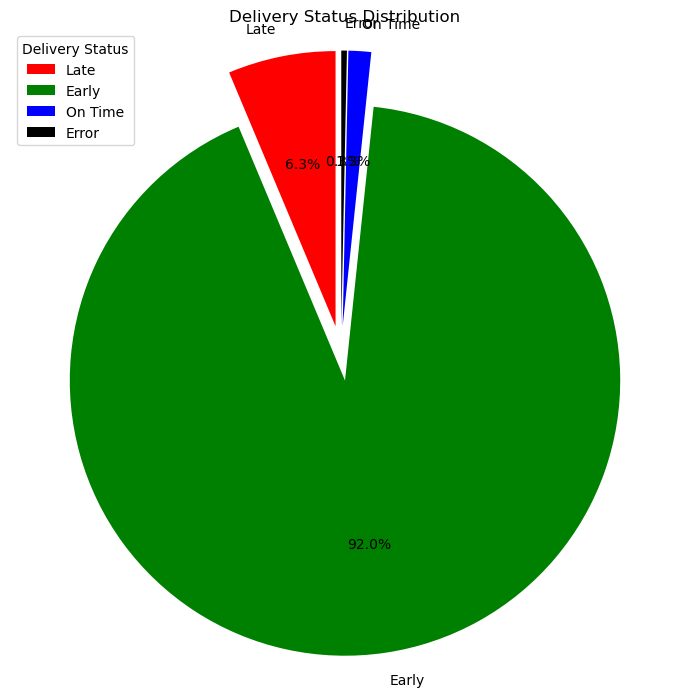

In [243]:
# Pie chart
sizes = [late, early, ontime, error]
labels = ['Late', 'Early', 'On Time', 'Error']
colors = ['red', 'green', 'blue', 'black']

# Create an explode effect to separate the slices
explode = (0.1, 0.1, 0.1, 0.1)  # Slightly separate each slice

fig, ax = plt.subplots(figsize=(7, 7))  # Adjust the figure size to make the chart bigger
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
ax.set_title('Delivery Status Distribution')
ax.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.

# Add a legend
plt.legend(labels, title="Delivery Status", loc="upper left")

# Adjust layout
plt.tight_layout()

plt.show()

In [244]:
df['late'] = (df['shipping_delay'].gt(0) & df['shipping_delay'].lt(700))
df[df['late']]

order_id                       customer_id  \
30     40f5d5356396abbec18c0c893d329422  24ee1aafc38ba4ae08741da0bd57520a   
53     7b74647ef95b9578401bd8a4f723b301  43ae0f58c3e63919119fa948c2efee95   
59     ec97666defb2e1fade6931649731f776  4abad51a71113d2de9e00350623a66ec   
77     70dc122cb381c36bb405197904788449  58d5ef4db3cdde11b1c71f8910cb824d   
88     ead4bdb20456cba846bb4d83e5a870a0  6f20d25d531f55dab91b8dff9d7ccb3b   
...                                 ...                               ...   
94417  dd0bea5264dc96c52500ff22a23655e8  387db65606f00fad77963367a9d52c1c   
94428  479ca7b6834ffb05666e813c9c0dddf8  7736f29fbade4b21885578b5030282dc   
94451  ee5e794b783fcf28dc28ff987a6f08b2  da23d4ed5cb0efe5ea22d93e26a0924d   
94456  1aad12119a878d0718676e9190cdbf28  e763fc4213e00ef7f2efee91d1458820   
94457  0f6896ec061c74612b3a5ab4f2146d0e  ee185cc1e2f628edb1634c85c6a8cd20   

      order_status order_purchase_timestamp order_approved_at  \
30       delivered               2018-01-01        2018-01-01   
53       delivered               2017-12-01        2017-12-02   
59       delivered               2017-07-06        2017-07-07   
77       delivered               2017-04-16        2017-04-16   
88       delivered               2017-03-27        2017-03-27   
...            ...                      ...               ...   
94417    delivered               2018-03-08        2018-03-09   
94428    delivered               2018-05-21        2018-05-23   
94451    delivered               2018-03-09        2018-03-09   
94456    delivered               2018-01-08        2018-01-11   
94457    delivered               2018-03-12        2018-03-13   

      order_delivered_carrier_date order_delivered_customer_date  \
30                      2018-01-02                    2018-02-02   
53                      2017-12-04                    2018-01-05   
59                      2017-07-07                    2017-07-31   
77                      2017-04-17                    2017-05-26   
88                      2017-03-30                    2017-05-09   
...                            ...                           ...   
94417                   2018-03-09                    2018-04-07   
94428                   2018-06-01                    2018-06-15   
94451                   2018-03-09                    2018-04-11   
94456                   2018-01-11                    2018-02-07   
94457                   2018-03-14                    2018-04-24   

      order_estimated_delivery_date  order_item_id  \
30                       2018-02-01            1.0   
53                       2017-12-29            1.0   
59                       2017-07-28            1.0   
77                       2017-05-10            1.0   
88                       2017-04-25            1.0   
...                             ...            ...   
94417                    2018-04-04            1.0   
94428                    2018-06-06            1.0   
94451                    2018-04-02            1.0   
94456                    2018-02-06            1.0   
94457                    2018-04-12            1.0   

                             product_id  ... customer_zip_code_prefix  \
30     547b95702aec86f05ac37e61d164891c  ...                    94480   
53     0da9ffd92214425d880de3f94e74ce39  ...                    25070   
59     e251ebd2858be1aa7d9b2087a6992580  ...                    25576   
77     08574b074924071f4e201e151b152b4e  ...                    24745   
88     08574b074924071f4e201e151b152b4e  ...                    89218   
...                                 ...  ...                      ...   
94417  41e153b95adc3c7f781b583292f312cd  ...                    90520   
94428  ac850a749748b386d598124ae34ba1b0  ...                     3337   
94451  d43c65f300c5cfaae005f1f954fc0b15  ...                    29152   
94456  58a60c7961bc8fb3a05841dc6d594658  ...                    88135   
94457  db9640150707535e9dcddb8a78c87104  ...            

In [245]:
late_delivery_info = df[df['late'] == True][['seller_city', 'customer_city', 'seller_state', 'customer_state', 'product_name']]

In [225]:
late_delivery_info['seller_city'].value_counts()

seller_city
sao paulo                1454
ibitinga                  551
ribeirao preto            216
sao jose do rio preto     156
santo andre               144
                         ... 
alambari                    1
morrinhos                   1
campina das missoes         1
santo angelo                1
marica                      1
Name: count, Length: 317, dtype: int64

In [226]:
late_delivery_info['customer_city'].value_counts()

customer_city
rio de janeiro    663
sao paulo         596
salvador          164
porto alegre      131
belo horizonte    128
                 ... 
indiaroba           1
inhuma              1
jacareacanga        1
raul soares         1
aguas claras        1
Name: count, Length: 1146, dtype: int64

In [234]:
top_10_late_cities_seller = late_delivery_info['seller_city'].value_counts().head(10)
top_10_late_cities_seller

seller_city
sao paulo                1454
ibitinga                  551
ribeirao preto            216
sao jose do rio preto     156
santo andre               144
rio de janeiro            124
curitiba                  117
guariba                   116
maringa                   115
guarulhos                 111
Name: count, dtype: int64

In [233]:
top_10_late_cities_customer = late_delivery_info['customer_city'].value_counts().head(10)
top_10_late_cities_customer

customer_city
rio de janeiro    663
sao paulo         596
salvador          164
porto alegre      131
belo horizonte    128
brasilia          115
campinas          101
fortaleza          92
niteroi            90
sao goncalo        78
Name: count, dtype: int64

In [236]:
top_10_late_cities_seller = late_delivery_info['seller_state'].value_counts().head(10)
top_10_late_cities_seller

seller_state
SP    4598
PR     355
MG     335
RJ     273
SC     164
MA      70
RS      47
DF      40
BA      26
ES      16
Name: count, dtype: int64

In [237]:
top_10_late_cities_customer = late_delivery_info['customer_state'].value_counts().head(10)
top_10_late_cities_customer

customer_state
SP    1523
RJ    1409
MG     485
BA     375
RS     308
SC     270
ES     198
PR     182
CE     169
PE     145
Name: count, dtype: int64

In [242]:
late_delivery_info['product_name'].value_counts().head(10)

product_name
bed_bath_table           626
health_beauty            597
sports_leisure           473
furniture_decor          418
computers_accessories    385
watches_gifts            385
telephony                278
housewares               269
auto                     257
toys                     221
Name: count, dtype: int64

In [259]:
late_delivery_info['product_name'].value_counts().tail(10)

product_name
fashion_male_clothing                   3
tablets_printing_image                  3
home_comfort_2                          3
construction_tools_safety               2
fashio_female_clothing                  2
music                                   2
fashion_sport                           1
arts_and_craftmanship                   1
flowers                                 1
portable_kitchen_and_food_processors    1
Name: count, dtype: int64

#### Most selling product

In [249]:
top_selling_products = df['product_name'].value_counts().head(10)
top_selling_products

product_name
bed_bath_table           9063
health_beauty            8569
sports_leisure           7448
computers_accessories    6474
furniture_decor          6165
housewares               5644
watches_gifts            5437
telephony                4050
auto                     3773
toys                     3740
Name: count, dtype: int64

In [258]:
total_price_per_product = df.groupby('product_name')[['payment_value', 'price']].sum().reset_index()

total_price_per_product_sorted = total_price_per_product.sort_values(by='payment_value', ascending=False)

total_price_per_product_sorted

product_name  payment_value       price
43              health_beauty     1385267.35  1161610.64
72              watches_gifts     1234542.84  1122283.69
7              bed_bath_table     1186642.45   872832.98
67             sports_leisure     1095091.19   873853.72
15      computers_accessories     1016128.46   754333.52
..                        ...            ...         ...
59                   pc_gamer        1391.67     1087.95
46             home_comfort_2        1237.73      669.97
11          cds_dvds_musicals         954.99      640.00
29  fashion_childrens_clothes         718.98      519.95
63      security_and_services         324.51      283.29

[73 rows x 3 columns]

In [114]:
# which region experience longer delays?
## Freight Price and Product Price?

### Payment method vs order value

In [ ]:
# which payment method is used for the most valued product
#payment type per product



# RMF

# CHURN PREDICTION

In [2]:
print("churn prediction")

churn prediction
